In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [0]:
from sklearn.datasets import load_boston
dataset = load_boston()

In [0]:
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [0]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
df['MEDV'] = dataset.target

In [0]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

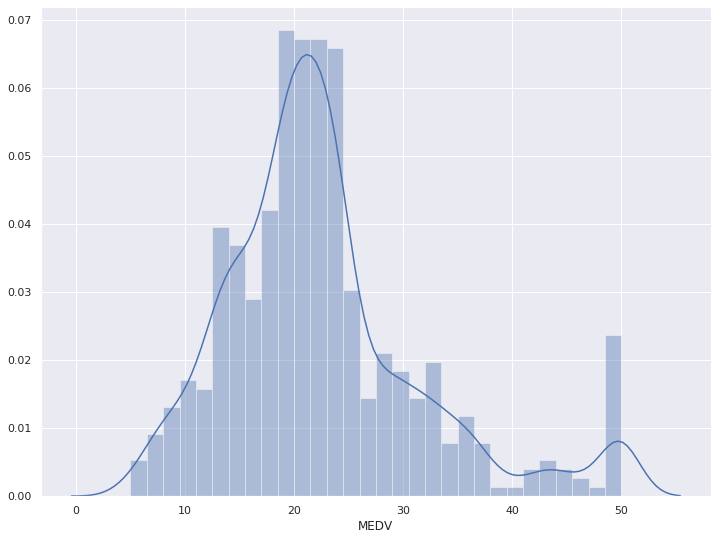

In [0]:
sns.set(rc={'figure.figsize':(12, 9)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

Create features and labels dataframe

In [5]:
# Seperate Data into Features and Labels and load them as a Pandas Dataframe
# Features
features_df = pd.DataFrame(np.array(dataset.data), columns=[dataset.feature_names])
features_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# Labels
labels_df = pd.DataFrame(np.array(dataset.target), columns=['labels'])
labels_df.head()

,labels
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Question 1

1. Normalize the data using StandardScaler from sklearn. [0.5]
2. Split the multivariate data into training/validation data (20% validation data) and plot train error and validation error as a function of the lambda regularizer. [1]

In [0]:
# Train Test Split
from sklearn.model_selection import train_test_split

# Training Data = 80% of Dataset
# Test Data = 20% of Dataset
X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.2, random_state=101)

# Normalize Data
from sklearn.preprocessing import StandardScaler

# Define the Preprocessing Method and Fit Training Data to it
scaler = StandardScaler()
scaler.fit(X_train)

# Make X_train to be the Scaled Version of Data
# This process scales all the values in all 13 columns and replaces them with the new values
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

# Converting from Pandas Dataframe to Numpy Arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Apply same Normalization for Test Features
scal = StandardScaler()
scal.fit(X_test)

# Make X_test to be the Scaled Version of Data
# This process scales all the values in all columns and replaces them with the new values
X_test = pd.DataFrame(data=scal.transform(X_test), columns=X_test.columns, index=X_test.index)

# Convert test features and Labels to Numpy Arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

#add bias factor in train and test 
X_train = np.hstack((np.ones((404,1)), X_train))
X_test = np.hstack((np.ones((102,1)), X_test))

Plot the training error as a function of lambda regularizer 

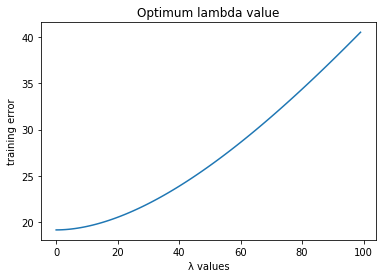

In [8]:
λ = 0
λ_array = []
train_error_arr = []
f = 14
i = 0

for _ in range(100):

  # analytical solution
  w = np.linalg.inv(X_train.T.dot(X_train) + (λ)*np.identity(f)).dot(X_train.T).dot(y_train)

  # prediction
  yPred = X_train.dot(w)

  train_error = mean_squared_error(yPred, y_train)
  train_error_arr.append(train_error)

  λ_array.append(λ)
  
  λ = λ + 1

# plotting the training error as a function of lambda regularizer 
plt.plot(λ_array, train_error_arr) 
  
# naming the x axis 
plt.xlabel('λ values') 
# naming the y axis 
plt.ylabel('training error') 
  
# giving a title to my graph 
plt.title('Optimum lambda value') 
  
# function to show the plot 
plt.show()

Plot the testing error as a function of lambda regularizer 

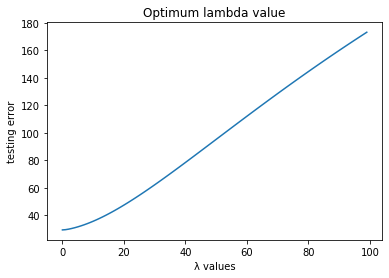

In [9]:
λ = 0
λ_array = []
yPred_arr = []
test_error_arr = []
f = 14
i = 0

for _ in range(100):

  # analytical solution
  w = np.linalg.inv(X_test.T.dot(X_test) + (λ)*np.identity(f)).dot(X_test.T).dot(y_test)

  # prediction
  yPred = X_test.dot(w)

  test_error = mean_squared_error(yPred, y_test)
  test_error_arr.append(test_error)

  λ_array.append(λ)
  
  λ = λ + 1

# plotting the training error as a function of lambda regularizer 
plt.plot(λ_array, test_error_arr) 
  
# naming the x axis 
plt.xlabel('λ values') 
# naming the y axis 
plt.ylabel('testing error') 
  
# giving a title to my graph 
plt.title('Optimum lambda value') 
  
# function to show the plot 
plt.show()

Lambda where the **best fit** occurs, happens to be equal to **λ = 0** in this dataset.

### Question 2

1. Derive the gradient of the $L_2$ regularized objective for Linear Regression, $\frac{\partial}{\partial \theta_j}J(\theta)$. Show your work (either by using in-line equations like we do here, or taking a picture of your work, and emdedding it in the notebook). [1]

In [0]:
from google.colab import files
from IPython.display import Image

In [0]:
uploaded = files.upload()

Saving eqn.jpg to eqn.jpg


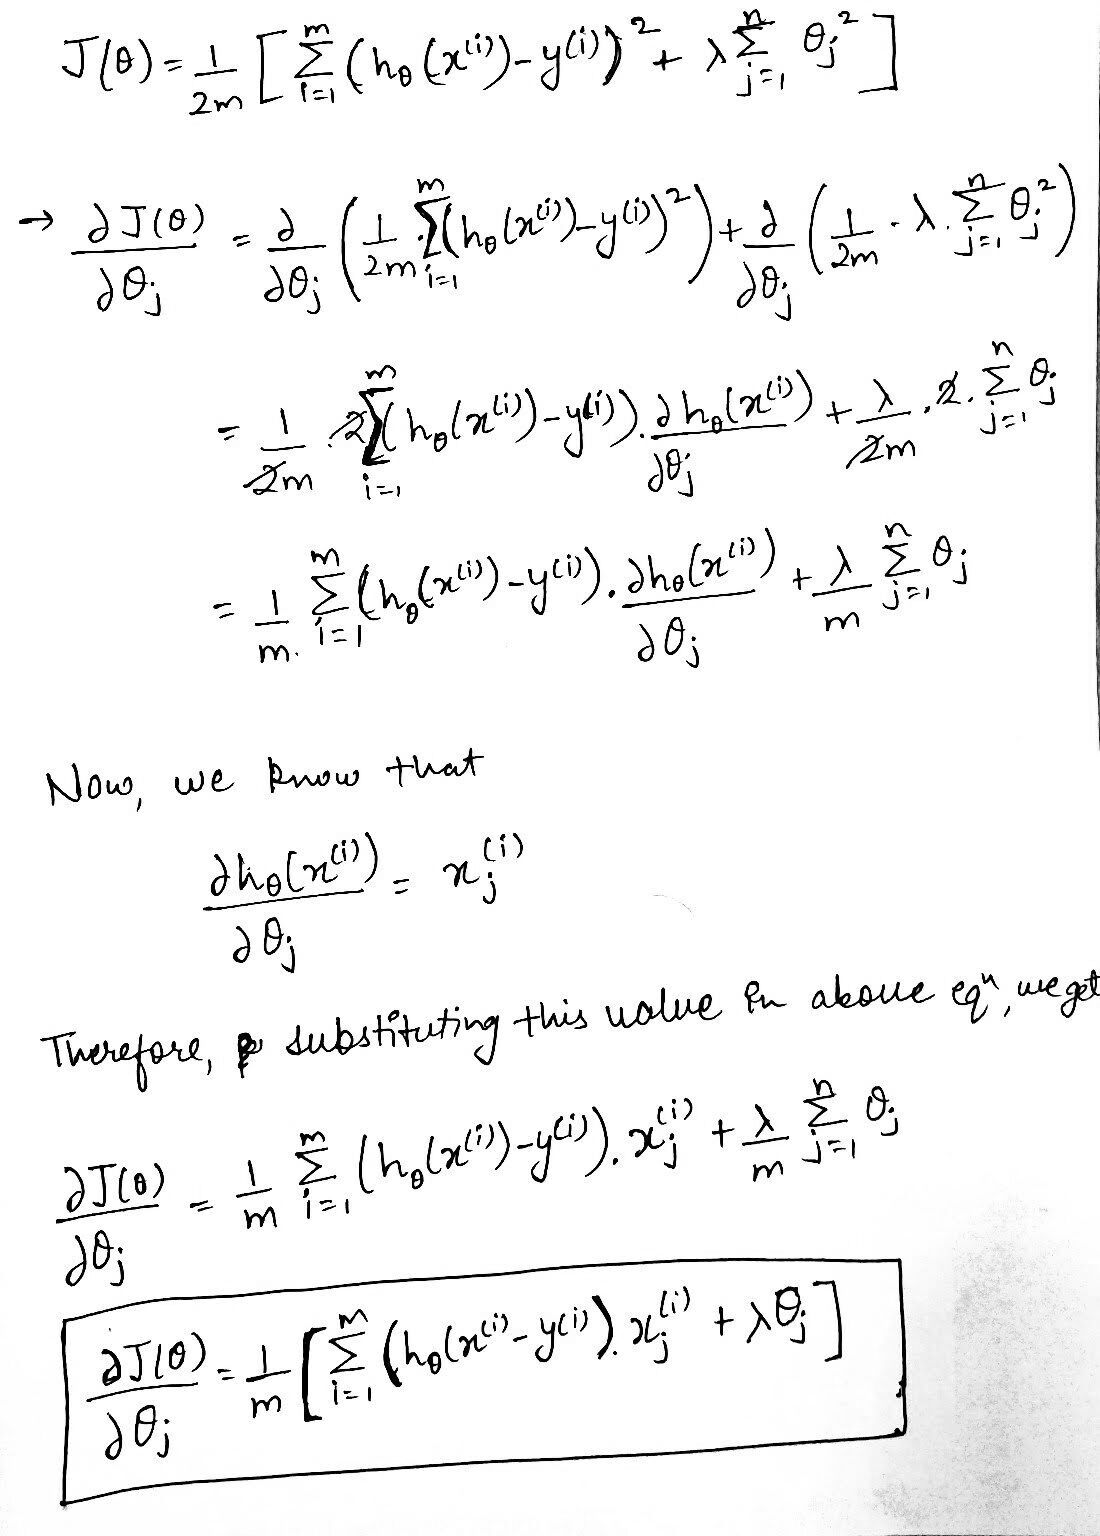

In [0]:
Image('eqn.jpg', width = 500)

### Question 3

1. Implement batch gradient descent for linear regression using a fixed learning rate $\eta$ of 1e-2. [1.5]

2. Run the gradient descent for a fixed number of epochs (based on convergence) and verify that the results closely approximate the matrix solution with the same lambda. [1]

In [0]:
#Implement batch gradient descent for linear regression using a fixed learning rate  η  of 1e-2 for a fix number of epochs.

def  cal_cost(theta,X,y):
    
    m = len(y)
    predictions = X.dot(theta)
    cost = mean_squared_error(predictions,y)
    return cost

def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):

    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,14))

    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)) )
        theta_history[it] = theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

In [0]:
np.random.seed(0)
#theta = np.random.randn(14,1)
theta = np.zeros((14,1))

p = gradient_descent(X_train,y_train, theta)

In [42]:
#verify that the results closely approximate the matrix solution with the same lambda in case of analytical solution

λ = 0
f = 14

# analytical solution
w = np.dot(np.linalg.inv(np.dot(X_train.T, X_train) + (λ)*np.identity(f)), np.dot(X_train.T, y_train))

print('Weight matrix from analytical solution : \n',w)
print('Weight matrix from batch Gradient descent : \n',p[0])
print('Difference between two matrices : \n', w-p[0])

Weight matrix from analytical solution : 
 [[22.33688119]
 [-0.79122527]
 [ 0.95297591]
 [ 0.11484236]
 [ 0.76526816]
 [-1.7739148 ]
 [ 2.70386142]
 [-0.0234735 ]
 [-3.01184276]
 [ 2.31803484]
 [-1.76927368]
 [-1.90794551]
 [ 0.75690641]
 [-3.75539706]]
Weight matrix from batch Gradient descent : 
 [[14.16086027]
 [-0.53125512]
 [ 0.40073555]
 [-0.5113598 ]
 [ 0.81902963]
 [-0.3550856 ]
 [ 2.55047639]
 [-0.23199661]
 [-0.65442762]
 [-0.02127161]
 [-0.46291022]
 [-1.40897417]
 [ 0.64085365]
 [-2.18471256]]
Difference between two matrices : 
 [[ 8.17602092]
 [-0.25997015]
 [ 0.55224035]
 [ 0.62620215]
 [-0.05376147]
 [-1.41882919]
 [ 0.15338502]
 [ 0.20852311]
 [-2.35741513]
 [ 2.33930646]
 [-1.30636346]
 [-0.49897135]
 [ 0.11605275]
 [-1.5706845 ]]


From above output we can see that batch gradient descent closely approximates the analytical solution when lambda = 0.01.

### Question 4

1. Plot training error performance vs. number of epochs as a function of learning rate $\eta$ for a range of values {1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1} with each $\eta$ being a different line. [1]

For very low $\eta$, gradient descent should be slow to converge.  For very high $\eta$, the error might be very unstable (i.e., not decreasing on every epoch).

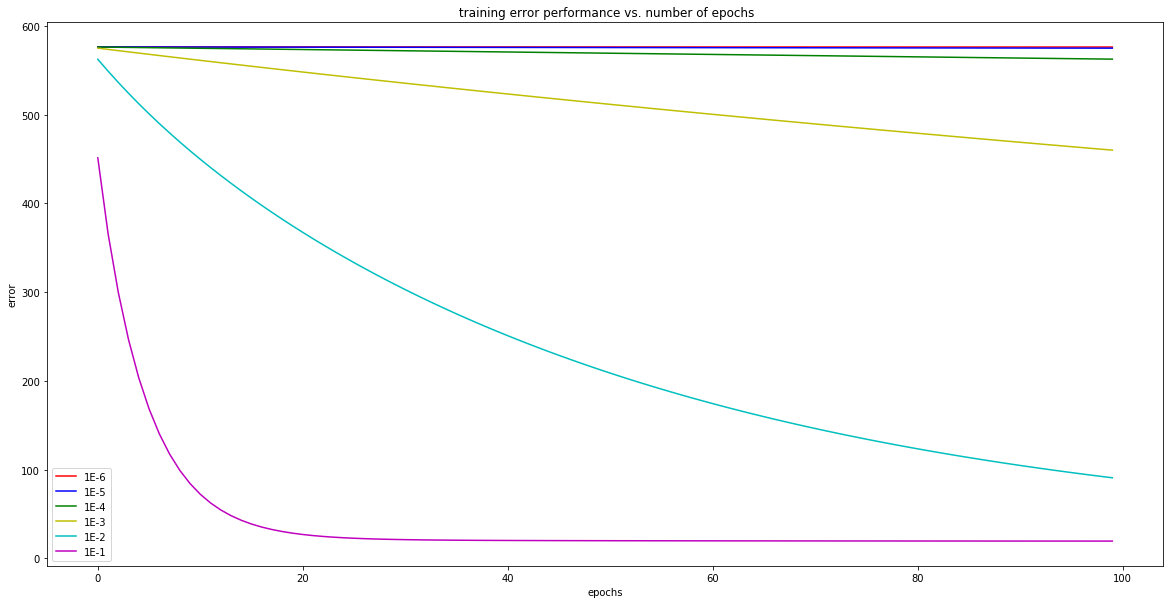

In [40]:
import matplotlib.pyplot as pl

learning_rate = [1E-6, 1E-5, 1E-4, 1E-3, 1E-2, 1E-1]    
all_results=[]

for i in range(len(learning_rate)):
    np.random.seed(0)
    theta = np.zeros((14,1))
    a = gradient_descent(X_train, y_train,theta,learning_rate = learning_rate[i])
    all_results.append(a[1])
    
    
q = all_results[0]    
w = all_results[1] 
e = all_results[2] 
r = all_results[3] 
t = all_results[4] 
y = all_results[5]     
    
y1label = '1E-6'
y2label = '1E-5'
y3label = '1E-4'
y4label = '1E-3'
y5label = '1E-2'
y6label = '1E-1'

pl.title(' training error performance vs. number of epochs')
pl.xlabel(r'epochs')
pl.ylabel(r'error')

plot1 = pl.plot(range(100), q, 'r', label=y1label)
plot2 = pl.plot(range(100), w, 'b', label=y2label)
plot3 = pl.plot(range(100), e, 'g', label=y3label)
plot4 = pl.plot(range(100), r, 'y', label=y4label)
plot5 = pl.plot(range(100), t, 'c', label=y5label)
plot6 = pl.plot(range(100), y, 'm', label=y6label)

pl.legend()

pl.show()

### Question 5

Implement a mini-batch version with a batch_size constant B.  When B=1, it is stochastic gradient descent.  When B=#train data points, it is full-batch.  Anywhere in between is mini-batch.  

1. Choose B=1, B=16, B=128, B=256, and B=#data points and plot training error as a function of "# of gradient updates" and also separately as a function of "wall-clock time" for each value of B. [2]

2. All lines should be on the same plot. Which B leads to fastest convergence in terms of #gradient updates and in terms of "wall-clock time"? [1]

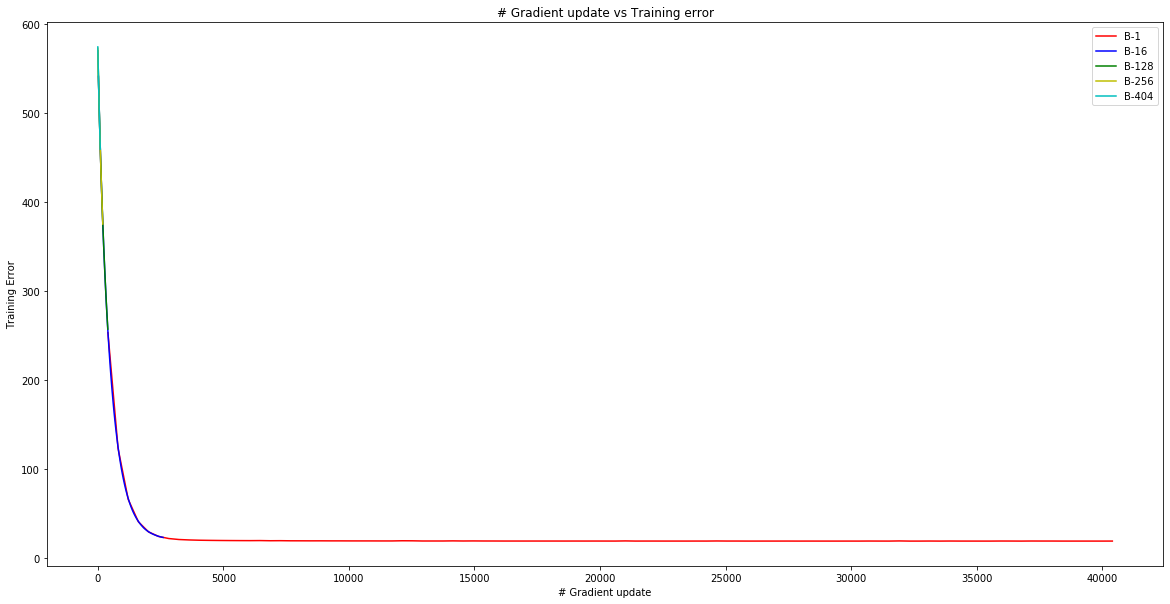

In [158]:
#Plot of training error vs number of gradient updates

import time,math

def  cal_cost(theta,X,y):
    m = len(y)
    predictions = X.dot(theta)
    cost = mean_squared_error(predictions,y)
    return cost

def updates(batch_size,iterations):
  update = np.zeros(iterations)
  number = 0
  for i in range(iterations):
    number+=math.ceil(404/batch_size)
    update[i] = number
  return update

def minibatch_gradient_descent(X,y,batch_size,learning_rate =0.001):
    m = len(y)
    iterations = 100
    cost_history = np.zeros(iterations)
    time_history = np.zeros(iterations)
    theta = np.zeros((14,1))
    gd_update = []
    t2_start = time.time()
    n_batches = 0
    
    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        
        for i in range(0,m,batch_size):
            
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]           
            prediction = np.dot(X_i,theta)
            grad = X_i.T.dot((prediction - y_i))/X_i.shape[0] 
            theta = theta -learning_rate*grad

        cost = mean_squared_error(np.dot(X,theta), y)
        cost_history[it]  = cost
        t2_stop = time.time()
        z = (t2_stop-t2_start)
        time_history[it] = z

    return theta, cost_history, time_history


batch_size = [1,16,128,256,404]
all_cost=[]
t_result = []
gd_update_val =[]

for i in range(len(batch_size)):
    
    a = minibatch_gradient_descent(X_train, y_train,batch_size[i])
    all_cost.append(a[1])
    o = updates(batch_size[i],100)
    gd_update_val.append(o)


q = all_cost[0]    
w = all_cost[1] 
e = all_cost[2] 
r = all_cost[3] 
t = all_cost[4]     

m = gd_update_val[0]
n = gd_update_val[1]
b = gd_update_val[2]
v = gd_update_val[3]
c = gd_update_val[4]

y1label = 'B-1'
y2label = 'B-16'
y3label = 'B-128'
y4label = 'B-256'
y5label = 'B-404'

pl.title('# Gradient update vs Training error')
pl.xlabel(r'# Gradient update')
pl.ylabel(r'Training Error')

plot1 = pl.plot(m, q, 'r', label=y1label)
plot2 = pl.plot(n, w, 'b', label=y2label)
plot3 = pl.plot(b, e, 'g', label=y3label)
plot4 = pl.plot(v, r, 'y', label=y4label)
plot5 = pl.plot(c, t, 'c', label=y5label)

pl.rcParams['figure.figsize'] = [20, 10]
pl.legend()
pl.show()

1. When **Batch size = 404**, the **Number of gradient updates is small** as compared to other batch sizes. But this batch size also has the **highest error**. 

2. Whereas, when **Batch size = 1**, the **Number of gradient updates is largest** as compared to other batch sizes but has the **lowest error**.

3. Since convergence means reaching the lowest error value; in this case when **B=1**, the **algorithm converges the fastest** in terms of number of gradient updates.

Elapsed time during the whole program in s: 0.4468414240000129 s


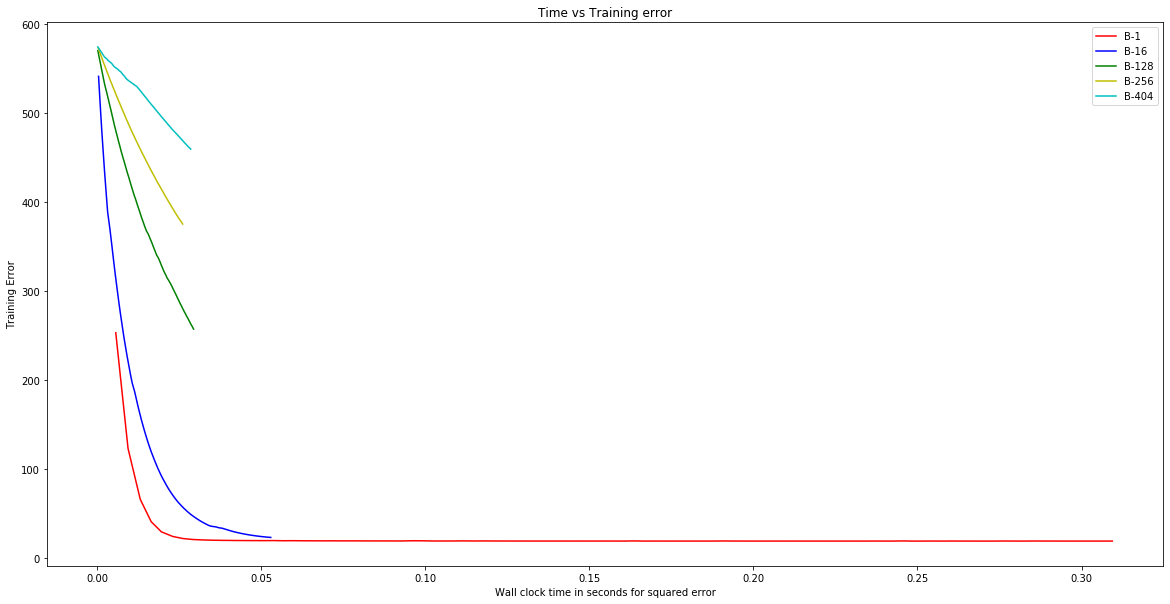

In [159]:
#Plot of training error vs wall clock time
from time import perf_counter

t5_start = perf_counter()
for i in range(len(batch_size)):
    
    a = minibatch_gradient_descent(X_train, y_train,batch_size[i])
    all_cost.append(a[1])
    t_result.append(a[2])
t6_stop = perf_counter()

print("Elapsed time during the whole program in s:", t6_stop-t5_start, 's')

l = t_result[0]
k = t_result[1]
j = t_result[2]
h = t_result[3]
g = t_result[4]


pl.title('Time vs Training error')
pl.xlabel(r'Wall clock time in seconds for squared error')
pl.ylabel(r'Training Error')

plot1 = pl.plot(l, q, 'r', label=y1label)
plot2 = pl.plot(k, w, 'b', label=y2label)
plot3 = pl.plot(j, e, 'g', label=y3label)
plot4 = pl.plot(h, r, 'y', label=y4label)
plot5 = pl.plot(g, t, 'c', label=y5label)

pl.rcParams['figure.figsize'] = [20, 10]
pl.legend()
pl.show()

1. From the above graph of **Training error vs Wall clock time** we can see that when **B=1**, the **algorithm took more time** to converge to an error of 0.

2. We can also see that, the time taken by algorithm when **B=404** is very less as compared to other batch sizes but in this case the **error is more**.

3. Since **convergence means reaching to lowest error; When B=1**, the algorithm converges fastest  in terms of **Wall clock time**.

### Question 6

1. Switch to absolute error for loss but still use $L_2$ regularization. Derive the gradient for this case, $\frac{\partial}{\partial \theta_j}J(\theta)$. [1.5]


2. Tune $\eta$ and B to obtain good performance (fast convergence to minimum error, but not noisy).  Is it easier to train with squared error or absolute error, why?  Show some plots that help you demonstrate this point and explain. [1]

In [0]:
uploaded = files.upload()

Saving err.jpg to err.jpg


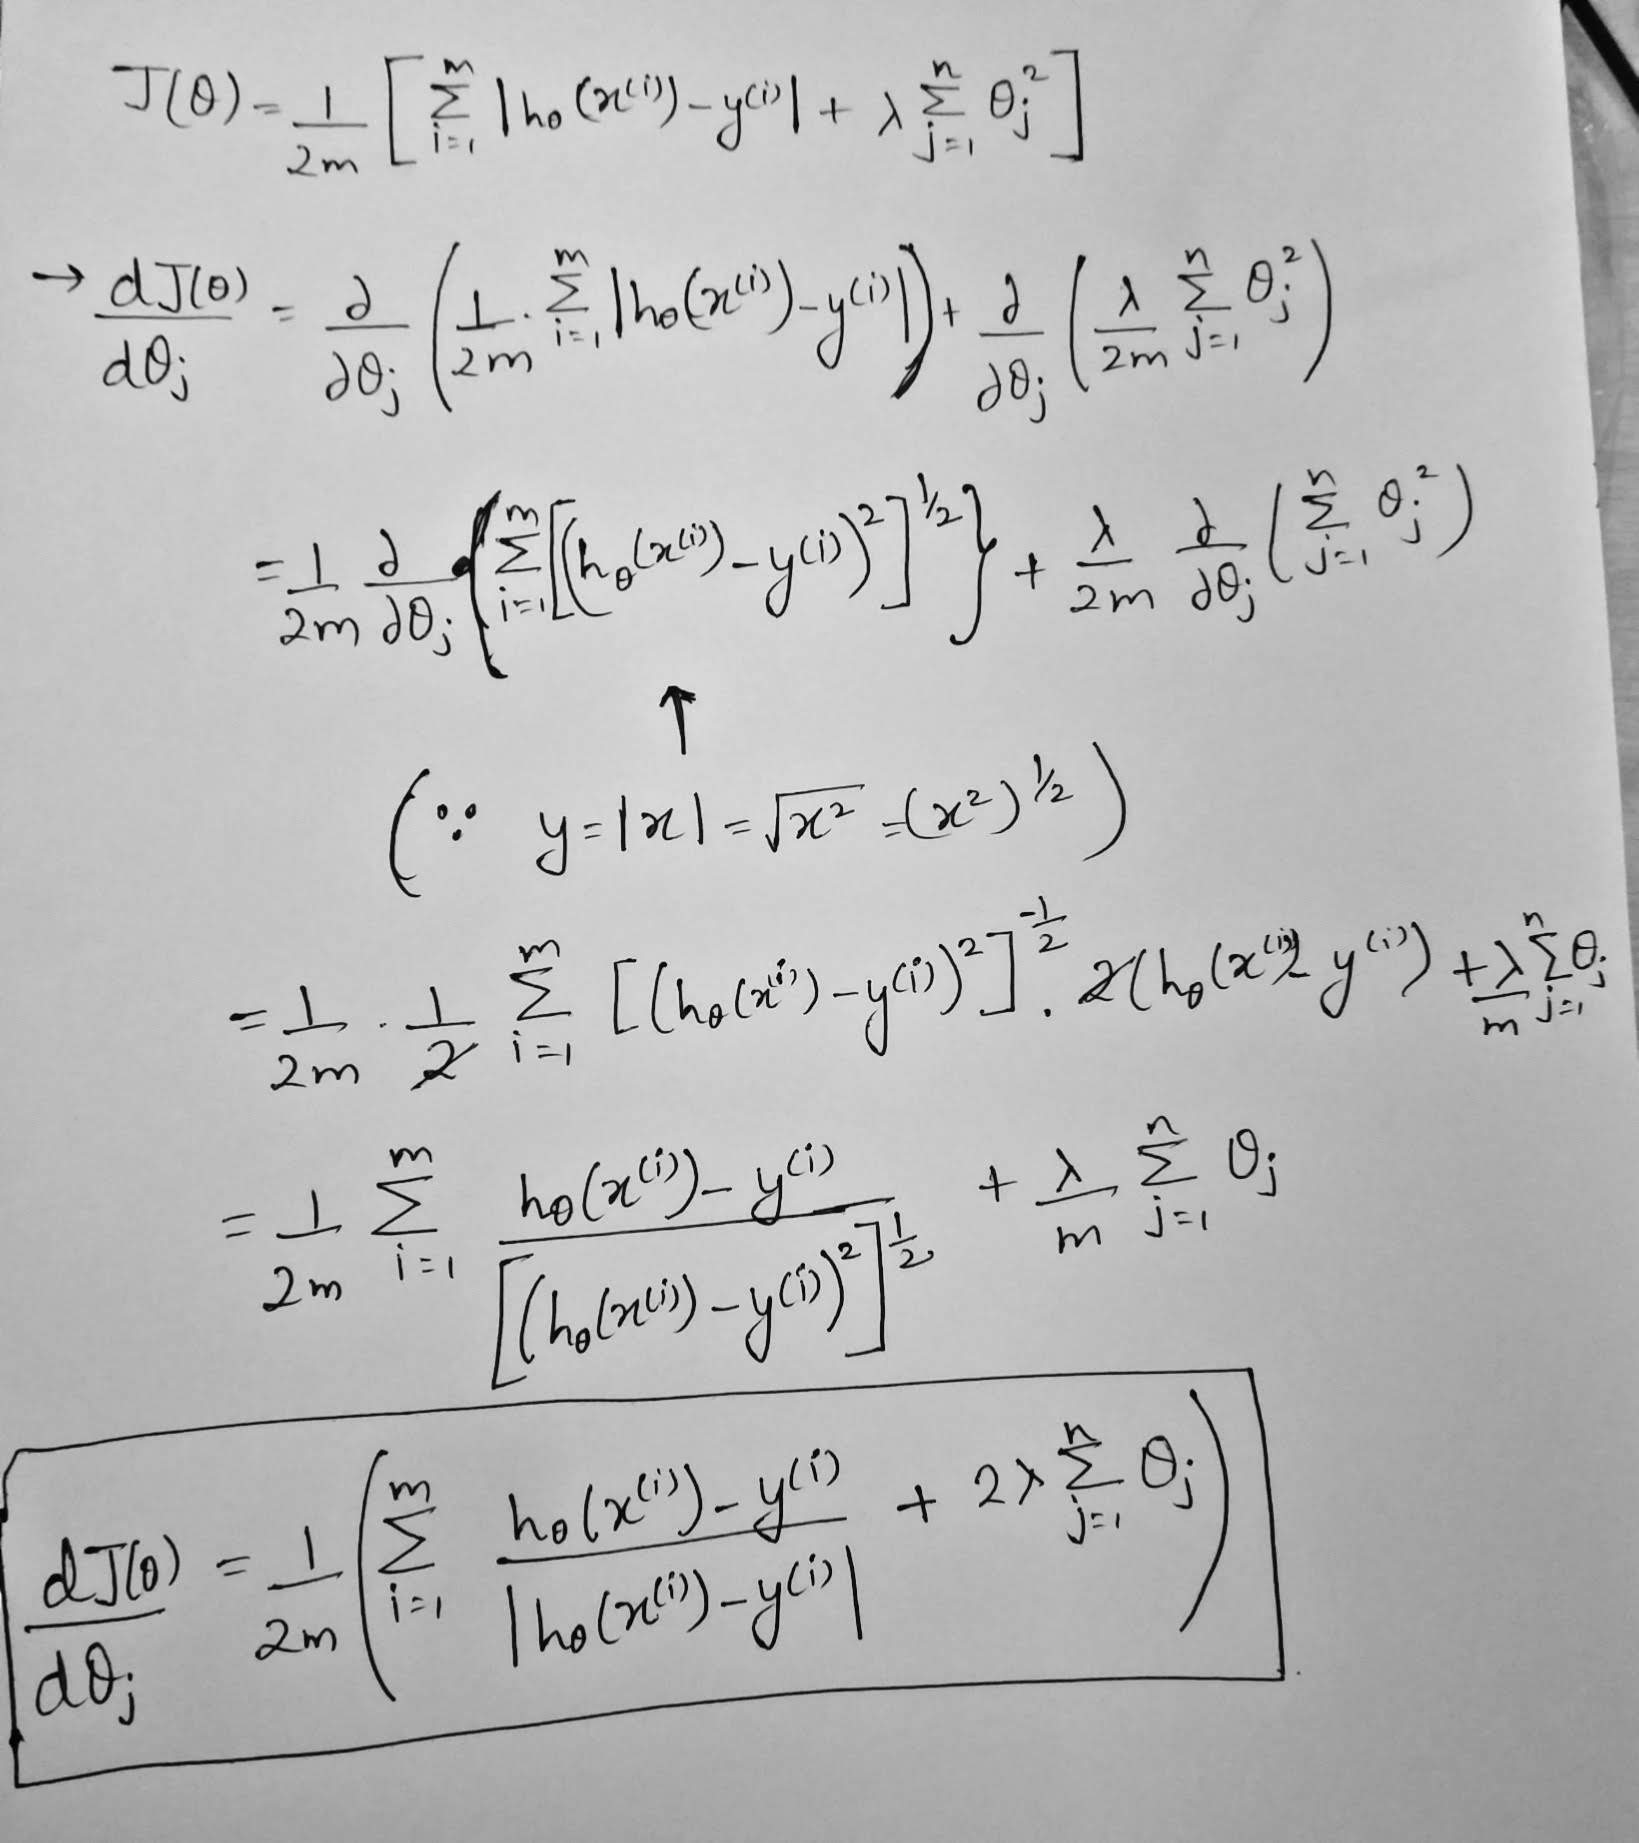

In [0]:
Image('err.jpg', width = 500)

Above image shows the gradient  $\frac{\partial}{\partial \theta_j}J(\theta)$ when we have absolute error loss with L2 regularization.



Elapsed time during the whole program in s: 0.6262240750002093 s


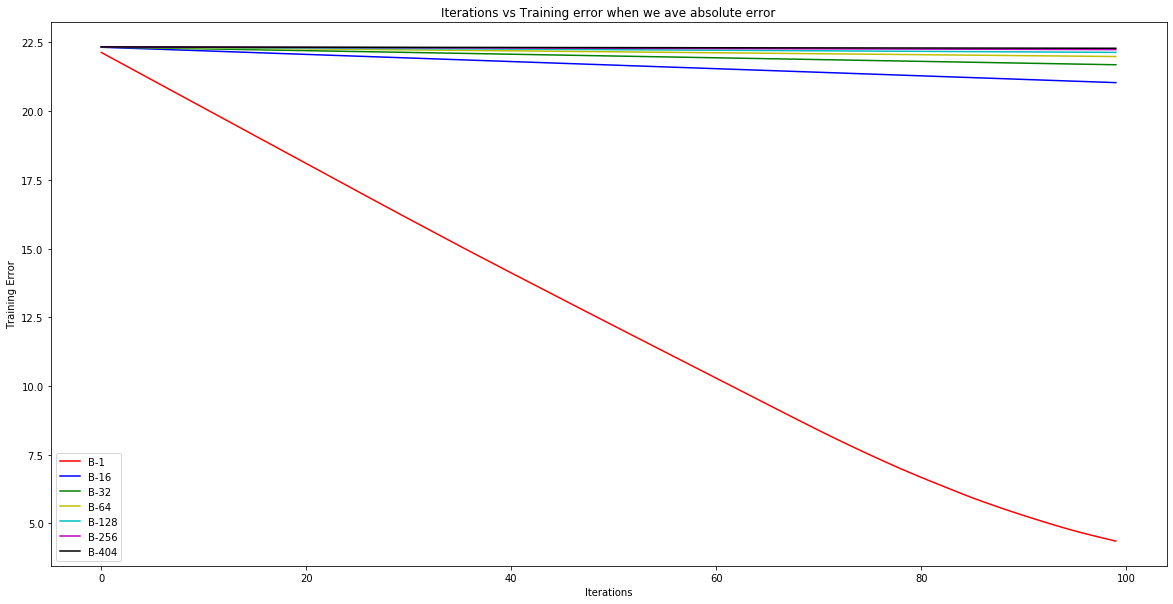

In [180]:
#Tune  η  and B to obtain good performance
#Here we will take 2 other extra batch sizes of 32 and 64 and see the difference in performance

from time import perf_counter
from sklearn.metrics import mean_absolute_error

def  cal_cost_abs(theta,X,y):
    m = len(y)    
    predictions = X.dot(theta)
    cost = (1/2*m) * abs(predictions-y) 
    return cost

def minibatch_gradient_descent_ae(X,y,batch_size,learning_rate =0.001):
    m = len(y)
    iterations = 100
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,14))
    time_history = np.zeros(iterations)
    theta = np.zeros((14,1))
    gd_update = np.zeros(iterations)
    t3_start = time.time()

    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        
        for i in range(0,m,batch_size):
            n_batches = int(m/batch_size)
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]         
            prediction = np.dot(X_i,theta)
            absolute = abs(prediction - y_i)/(prediction - y_i)
            gradi = (X_i.T.dot(absolute))/(2*X_i.shape[0])
            theta = theta -learning_rate * gradi 

        cost = mean_absolute_error(np.dot(X,theta),y)
        cost_history[it]  = cost
        theta_history = theta.T
        t3_end = time.time()
        time_history[it] = t3_end - t3_start
    return theta, cost_history, theta_history, time_history

batch_size = [1,16,32,64,128,256,404]
all_cost=[]
n_iter = 100
t1_start = perf_counter()

for i in range(len(batch_size)):
    a = minibatch_gradient_descent_ae(X_train, y_train,batch_size[i])
    all_cost.append(a[1])

t1_stop = perf_counter()

print("Elapsed time during the whole program in s:", t1_stop-t1_start, 's') 

q = all_cost[0]    
w = all_cost[1] 
e = all_cost[2] 
r = all_cost[3] 
t = all_cost[4] 
y = all_cost[5]
u = all_cost[6]    

y1label = 'B-1'
y2label = 'B-16'
y3label = 'B-32'
y4label = 'B-64'
y5label = 'B-128'
y6label = 'B-256'
y7label = 'B-404'

pl.title('Iterations vs Training error when we ave absolute error')
pl.xlabel(r'Iterations')
pl.ylabel(r'Training Error')

plot1 = pl.plot(range(n_iter), q, 'r', label=y1label)
plot2 = pl.plot(range(n_iter), w, 'b', label=y2label)
plot3 = pl.plot(range(n_iter), e, 'g', label=y3label)
plot4 = pl.plot(range(n_iter), r, 'y', label=y4label)
plot5 = pl.plot(range(n_iter), t, 'c', label=y5label)
plot6 = pl.plot(range(n_iter), y, 'm', label=y6label)
plot7 = pl.plot(range(n_iter), u, 'k', label=y7label)

pl.rcParams['figure.figsize'] = [20, 10]
pl.legend()
pl.show()

Elapsed time during the whole program in s: 2.8499301749980077 s


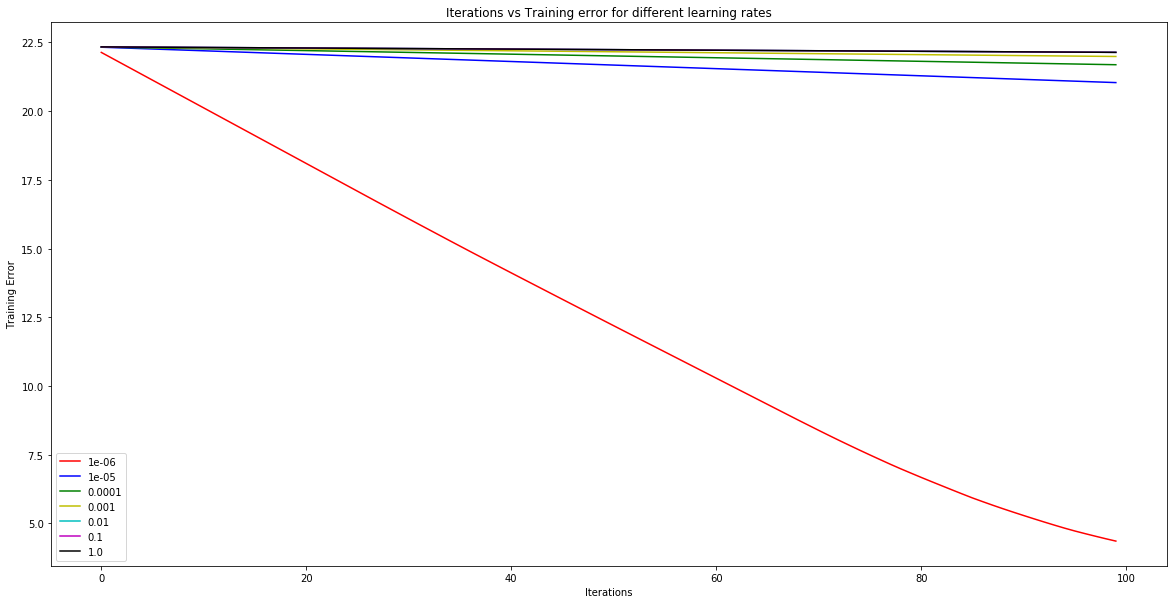

In [177]:
#Training error vs iterations for different learning rates in case of absolute error
#We have fixed the batch size = 1 in this case because from the above graph we can see that the algorithm converges to minimum error when B=1

learning_rate =[1E-6, 1E-5, 1E-4, 1E-3, 1E-2, 1E-1, 1E-0]   

t8_start = perf_counter()
for i in range(len(batch_size)):
    
    a = minibatch_gradient_descent_ae(X_train, y_train,1, learning_rate[i])
    all_cost.append(a[1])
    t_result.append(a[3])

t8_stop = perf_counter()

print("Elapsed time during the whole program in s:", t8_stop-t8_start, 's')


pl.title('Iterations vs Training error for different learning rates')
pl.xlabel(r'Iterations')
pl.ylabel(r'Training Error')

plot1 = pl.plot(range(n_iter), q, 'r', label=1E-6)
plot2 = pl.plot(range(n_iter), w, 'b', label=1E-5)
plot3 = pl.plot(range(n_iter), e, 'g', label=1E-4)
plot4 = pl.plot(range(n_iter), r, 'y', label=1E-3)
plot5 = pl.plot(range(n_iter), t, 'c', label=1E-2)
plot6 = pl.plot(range(n_iter), t, 'm', label=1E-1)
plot7 = pl.plot(range(n_iter), t, 'k', label=1E-0)

pl.rcParams['figure.figsize'] = [20, 10]
pl.legend()
pl.show()

From the above graphs we can see that when **Batch size = 1** and when **learning rate = 1E-6**, the algorithm converges to minimum error. So, we have tuned learning rate and batch size to obtain good performance when we have absolute error.

Now, we run mini_batch with **Squared error** as cost function and see the difference. 

Elapsed time during the whole program in s: 0.6262240750002093 s


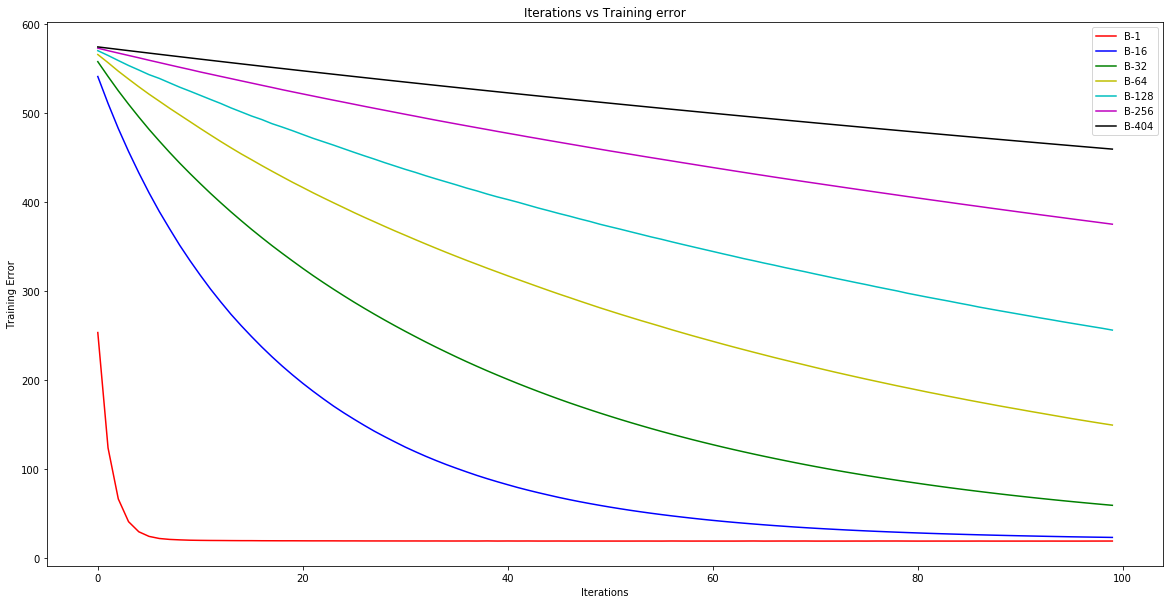

In [181]:
#Is it easier to train with squared error or absolute error?

batch_size = [1,16,32,64,128,256,404]
all_cost=[]
t_result = []
gd_update_val =[]

t8_start = perf_counter()
for i in range(len(batch_size)):
    
    a = minibatch_gradient_descent(X_train, y_train,batch_size[i])
    all_cost.append(a[1])
    o = updates(batch_size[i],100)
    gd_update_val.append(o)
t8_stop = perf_counter()

print("Elapsed time during the whole program in s:", t1_stop-t1_start, 's') 

q = all_cost[0]    
w = all_cost[1] 
e = all_cost[2] 
r = all_cost[3] 
t = all_cost[4] 
y = all_cost[5]
u = all_cost[6]    

y1label = 'B-1'
y2label = 'B-16'
y3label = 'B-32'
y4label = 'B-64'
y5label = 'B-128'
y6label = 'B-256'
y7label = 'B-404'

pl.title('Iterations vs Training error')
pl.xlabel(r'Iterations')
pl.ylabel(r'Training Error')

plot1 = pl.plot(range(n_iter), q, 'r', label=y1label)
plot2 = pl.plot(range(n_iter), w, 'b', label=y2label)
plot3 = pl.plot(range(n_iter), e, 'g', label=y3label)
plot4 = pl.plot(range(n_iter), r, 'y', label=y4label)
plot5 = pl.plot(range(n_iter), t, 'c', label=y5label)
plot6 = pl.plot(range(n_iter), y, 'm', label=y6label)
plot7 = pl.plot(range(n_iter), u, 'k', label=y7label)

pl.rcParams['figure.figsize'] = [20, 10]
pl.legend()
pl.show()

##*Some observations*

1. Mean squared error(MSE) has a very large range of error values as compared to Mean absolute error(MAE).

2. Because of the square, large errors have relatively greater influence on MSE than the smaller error. Therefore, MAE is more robust to outliers since it does not make use of square. 

3. On the other hand, MSE is more useful if we are concerned about large errors whose consequences are much bigger than equivalent smaller ones.

So, in this example, **Squared error** is a **good choice** for cost function.